图表已保存为 training_curves.png


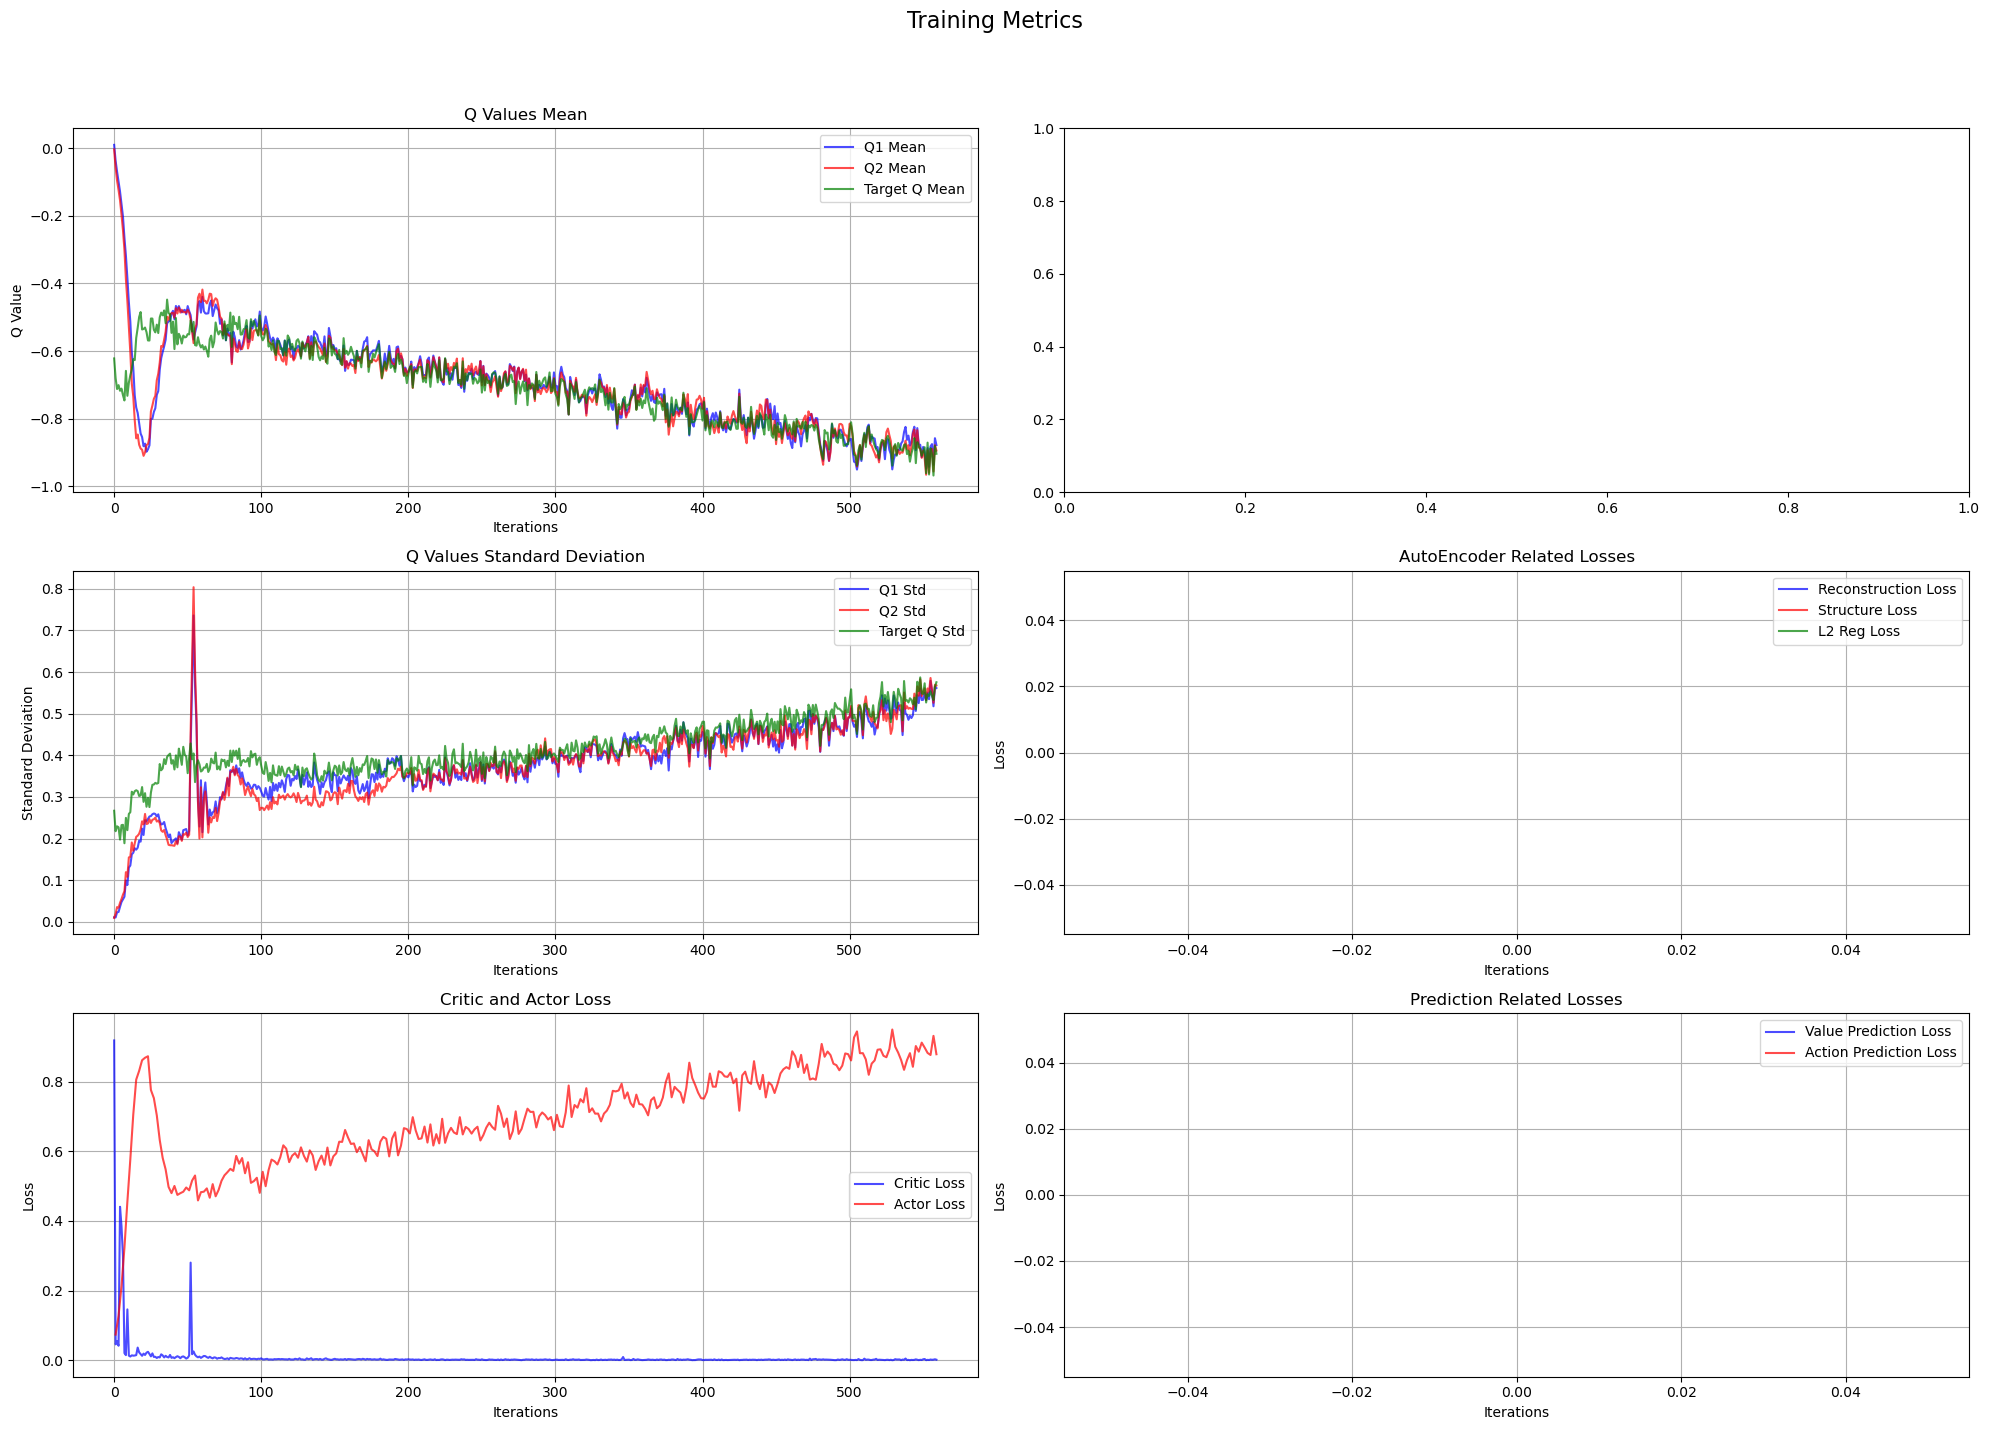

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_training_curves(log_file):
    # 读取JSON数据
    with open(log_file, 'r') as f:
        logs = json.load(f)
    
    # 设置图表
    fig = plt.figure(figsize=(20, 15))
    
    # 创建子图
    ax1 = plt.subplot(3, 2, 1)  # Q值相关
    ax2 = plt.subplot(3, 2, 2)  # Loss相关
    ax3 = plt.subplot(3, 2, 3)  # Q标准差
    ax4 = plt.subplot(3, 2, 4)  # AutoEncoder相关loss
    ax5 = plt.subplot(3, 2, 5)  # Critic和Actor Loss
    ax6 = plt.subplot(3, 2, 6)  # 预测相关Loss
    
    iterations = range(len(logs['actor_loss']))
    
    # 1. Q值相关图
    ax1.plot(iterations, logs['q1_mean'], 'b-', label='Q1 Mean', alpha=0.7)
    ax1.plot(iterations, logs['q2_mean'], 'r-', label='Q2 Mean', alpha=0.7)
    ax1.plot(iterations, logs['target_q_mean'], 'g-', label='Target Q Mean', alpha=0.7)
    ax1.set_title('Q Values Mean')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Q Value')
    ax1.legend()
    ax1.grid(True)
    
    # 2. Q标准差图
    ax3.plot(iterations, logs['q1_std'], 'b-', label='Q1 Std', alpha=0.7)
    ax3.plot(iterations, logs['q2_std'], 'r-', label='Q2 Std', alpha=0.7)
    ax3.plot(iterations, logs['target_q_std'], 'g-', label='Target Q Std', alpha=0.7)
    ax3.set_title('Q Values Standard Deviation')
    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Standard Deviation')
    ax3.legend()
    ax3.grid(True)
    
    # 3. Critic和Actor Loss
    ax5.plot(iterations, logs['critic_loss'], 'b-', label='Critic Loss', alpha=0.7)
    # 过滤掉None值
    actor_iterations = [it for it, loss in zip(iterations, logs['actor_loss']) if loss is not None]
    actor_losses = [loss for loss in logs['actor_loss'] if loss is not None]
    if actor_losses:  # 如果有actor loss数据
        ax5.plot(actor_iterations, actor_losses, 'r-', label='Actor Loss', alpha=0.7)
    ax5.set_title('Critic and Actor Loss')
    ax5.set_xlabel('Iterations')
    ax5.set_ylabel('Loss')
    ax5.legend()
    ax5.grid(True)
    
    # 4. AutoEncoder相关loss
    if logs['reconstruction_loss']:  # 如果有数据
        recon_iterations = [it for it, loss in zip(iterations, logs['reconstruction_loss']) if loss is not None]
        recon_losses = [loss for loss in logs['reconstruction_loss'] if loss is not None]
        struct_losses = [loss for loss in logs['structure_loss'] if loss is not None]
        l2_reg_losses = [loss for loss in logs['l2_reg_loss'] if loss is not None]
        
        ax4.plot(recon_iterations, recon_losses, 'b-', label='Reconstruction Loss', alpha=0.7)
        ax4.plot(recon_iterations, struct_losses, 'r-', label='Structure Loss', alpha=0.7)
        ax4.plot(recon_iterations, l2_reg_losses, 'g-', label='L2 Reg Loss', alpha=0.7)
        ax4.set_title('AutoEncoder Related Losses')
        ax4.set_xlabel('Iterations')
        ax4.set_ylabel('Loss')
        ax4.legend()
        ax4.grid(True)
    
    # 5. 预测相关loss
    if logs['value_prediction_loss']:  # 如果有数据
        value_pred_iterations = [it for it, loss in zip(iterations, logs['value_prediction_loss']) if loss is not None]
        value_pred_losses = [loss for loss in logs['value_prediction_loss'] if loss is not None]
        action_pred_losses = [loss for loss in logs['action_prediction_loss'] if loss is not None]
        
        ax6.plot(value_pred_iterations, value_pred_losses, 'b-', label='Value Prediction Loss', alpha=0.7)
        ax6.plot(value_pred_iterations, action_pred_losses, 'r-', label='Action Prediction Loss', alpha=0.7)
        ax6.set_title('Prediction Related Losses')
        ax6.set_xlabel('Iterations')
        ax6.set_ylabel('Loss')
        ax6.legend()
        ax6.grid(True)
    
    # 设置总标题
    plt.suptitle('Training Metrics', size=16)
    
    # 调整子图间距
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # 保存图片
    plt.savefig('training_curves.png', dpi=300, bbox_inches='tight')
    print("图表已保存为 training_curves.png")
    
    # 显示图表
    plt.show()

# 使用方法
plot_training_curves("./logs/training_logs.json")